In [ ]:
from glob import glob
from tqdm import tqdm
import numpy as np
import os 
import csv
import pandas
import sys
from embpred.config import RAW_DATA_DIR, PROCESSED_DATA_DIR
from embpred.plots import plot_histogram_2d_array
from skimage.io import imread

In [ ]:
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code
# in {{ cookiecutter.module_name }}, it gets loaded
%autoreload 2

EMB_STAGE_DS1 = RAW_DATA_DIR / "EmbStages" / "dataset1"
stage_dirs = glob(str(EMB_STAGE_DS1 / "*/"))
stage_names = [p for p in os.listdir(EMB_STAGE_DS1)]
stage_dirs, stage_names

In [ ]:
unique_shapes = {}
class_dist_500 = {stage_name:0 for stage_name in stage_names}
class_dist_800 = {stage_name:0 for stage_name in stage_names}
paths = []
classes = []
ims_small = []
freqs = []
t_multi_names = [f"t{i}" for i in range(3,9)]
t_multi_count = 0
print(t_multi_names)
for stage_dir, stage_name in zip(sorted(stage_dirs), sorted(stage_names)):
    im_files = glob(os.path.join(stage_dir, "*.jpeg"))
    print(stage_name, len(im_files))
    freqs.append(len(im_files))
    for file in im_files:
        paths.append(file)
        classes.append(stage_name)
        if stage_name in t_multi_names:
            t_multi_count+=1
        shape = imread(file).shape
        if len(shape) > 2:
            print("Found image with len(dim) greater than 2") 
        if shape not in unique_shapes:
            unique_shapes[shape] = 1
        else:
            unique_shapes[shape] += 1

        if 500 in shape:
            class_dist_500[stage_name]+=1
            ims_small.append(file)
        else:
            class_dist_800[stage_name] += 1
print(unique_shapes)
freqs.append(t_multi_count)

In [ ]:
import matplotlib.pyplot as plt
plt.bar(sorted(stage_names) + ["t_multi"], freqs)

In [18]:
import random
from skimage import io

def display_histograms(image_paths, classes):
    """
    Randomly samples 4 images of each class and displays their histograms in one Matplotlib figure.

    Parameters:
    image_paths (list): List of paths to images.
    classes (list): Parallel list of classes corresponding to each image.
    """
    # Ensure we have the same number of image paths and classes
    assert len(image_paths) == len(classes), "The length of image paths and classes must be the same."
    
    # Combine image paths and classes into a list of tuples and group by class
    data = list(zip(image_paths, classes))
    class_dict = {}
    
    for path, cls in data:
        if cls not in class_dict:
            class_dict[cls] = []
        class_dict[cls].append(path)
    
    # Set up the plot
    num_classes = len(class_dict)
    fig, axes = plt.subplots(num_classes, 4, figsize=(20, 5 * num_classes))
    fig.tight_layout(pad=5.0)
    
    for i, cls in enumerate(class_dict):
        # Randomly sample 4 images for each class
        sampled_paths = random.sample(class_dict[cls], 4)
        
        for j, path in enumerate(sampled_paths):
            image = io.imread(path)[:-25, :]
            flattened_image = image.flatten()
            
            # Plot histogram
            ax = axes[i, j] if num_classes > 1 else axes[j]
            ax.hist(flattened_image, bins=50, edgecolor='black')
            ax.set_title(f'Class {cls} - Image {j+1}')
            ax.set_xlabel('Pixel Value')
            ax.set_ylabel('Frequency')
    
    plt.show()

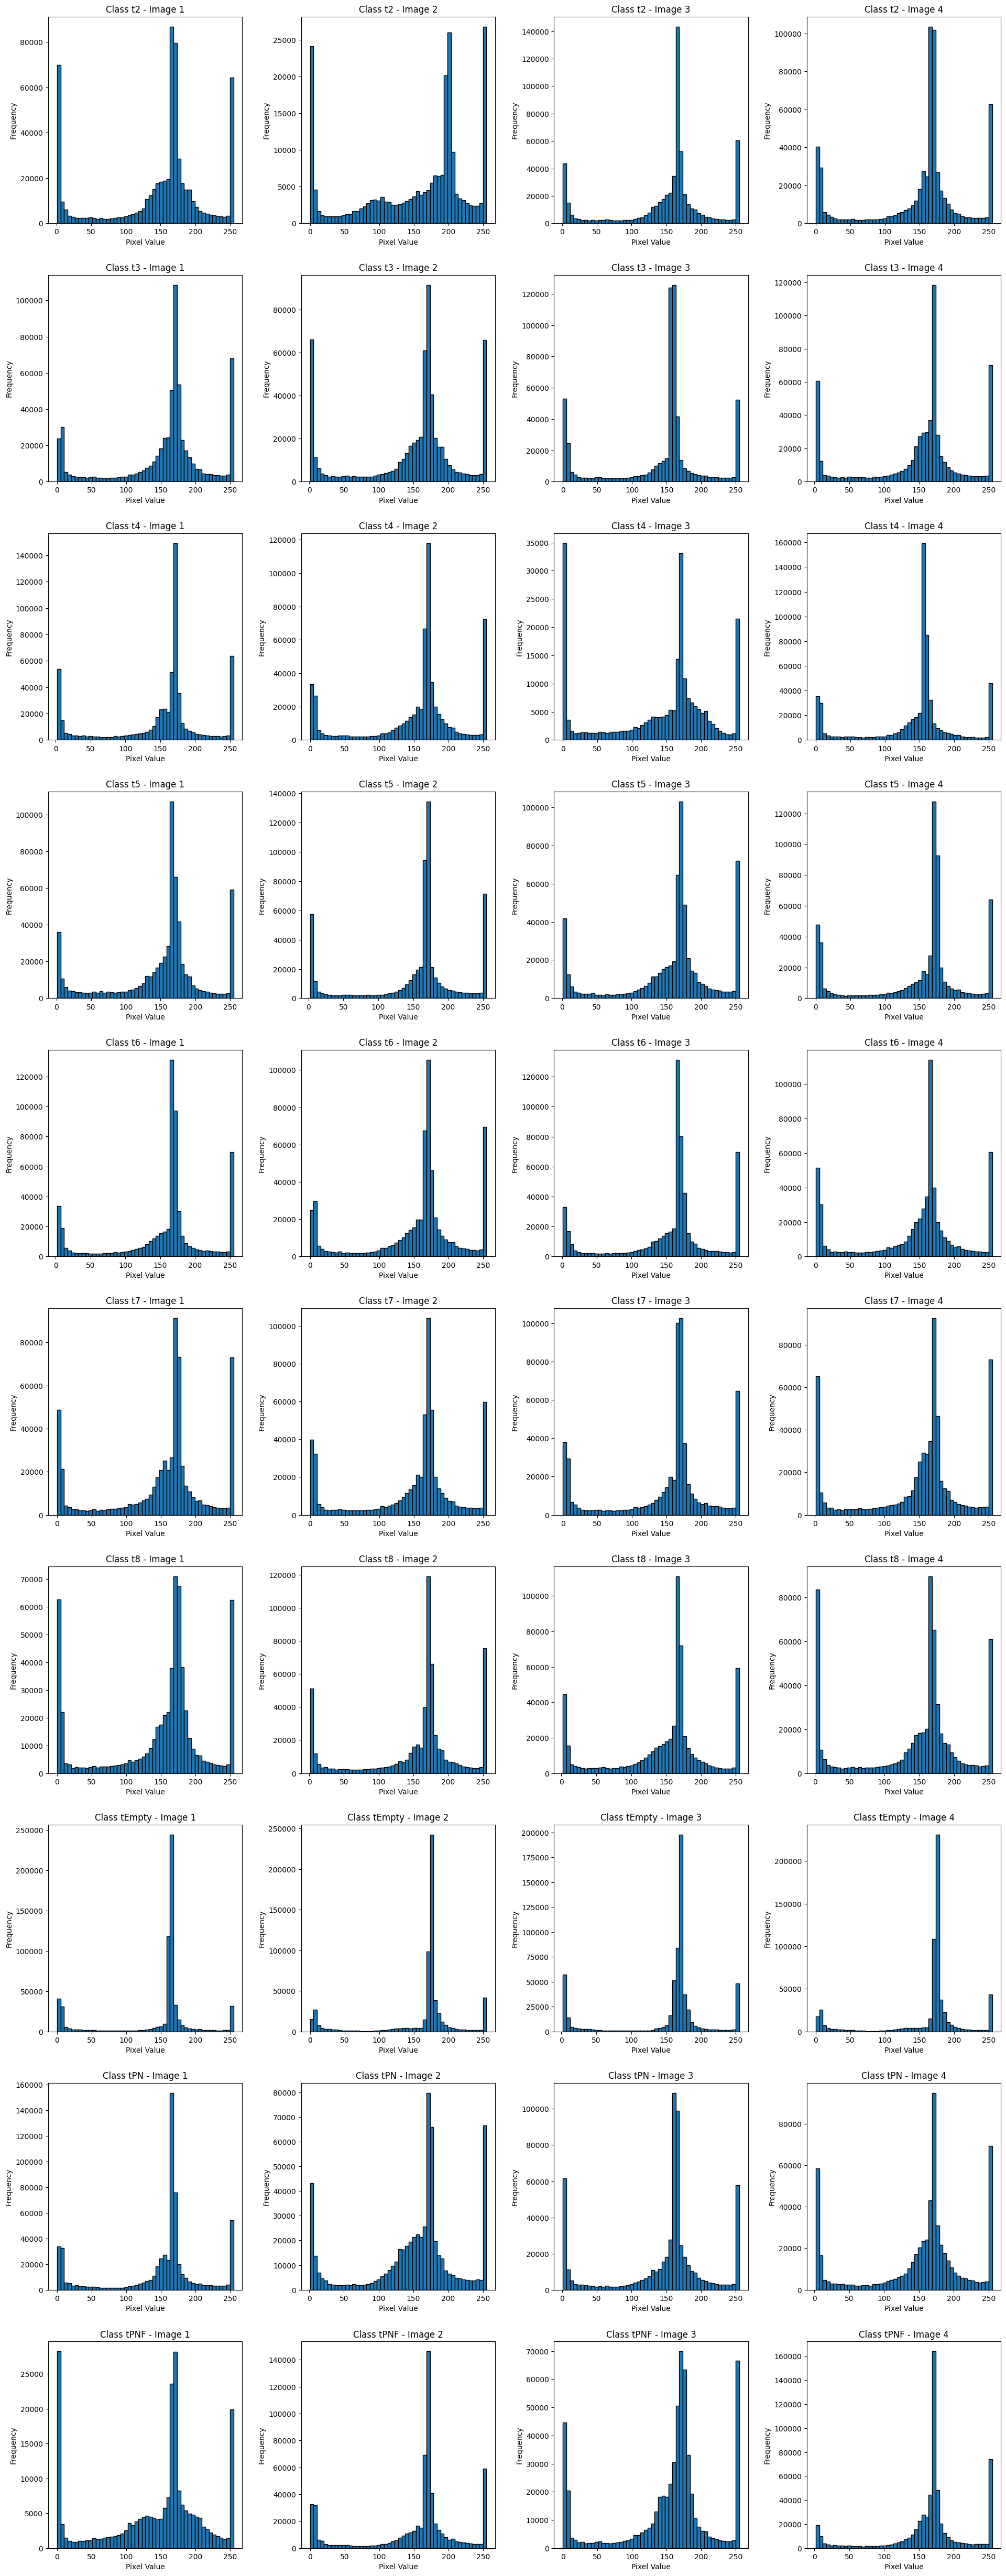

In [19]:
display_histograms(paths, classes)

In [20]:
from torchvision.io import read_image
tensor = read_image(paths[0])

In [21]:
tensor.shape

torch.Size([1, 500, 500])

In [23]:
new_tensor = tensor[:, :-25, :]

In [24]:
new_tensor.shape

torch.Size([1, 475, 500])

In [25]:
from skimage.io import imsave